In [735]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
#from pysheds.grid import Grid
from matplotlib.colors import LogNorm
warnings.filterwarnings("ignore")
import networkx as nx

# Task 1-a
Read the edges and nodes representing gas transmission pipelines into two separate GeoDataFrame 
objects


In [736]:
url_nodes ='https://tubcloud.tu-berlin.de/s/8SMwwWQyn6GiPez/download/scigrid-gas-nodes.geojson'
url_edges = 'https://tubcloud.tu-berlin.de/s/fF6KKpWtJyS3BmD/download/scigrid-gas-pipelines.geojson'
gdf_Nodes = gpd.read_file(url_nodes,index_col=0)
gdf_Nodes.head(5)
select = ['id','x','y']
gdf_nodes = gdf_Nodes[select]
gdf_nodes.set_index('id',inplace = True)
gdf_nodes.head(5)
gdf_Edges = gpd.read_file(url_edges).set_index("index")
gdf_Edges.tail(5)


,diameter_mm,is_bothDirection,length_km,max_cap_M_m3_per_d,max_pressure_bar,start_year,bus0,bus1,geometry
index,,,,,,,,,
EntsoG_Map__ST_25_Seg_0,900.0,0,72.845791,27.809143,70.0,NaN,SEQ_6435_p,INET_N_379,"LINESTRING (13.88715 36.19728, 14.55652 35.82884)"
EntsoG_Map__ST_26_Seg_0,900.0,0,89.750980,27.809143,70.0,NaN,N_14_M_LMGN,INET_N_1287,"LINESTRING (23.08042 61.76293, 21.39881 61.63817)"
EntsoG_Map__ST_26_Seg_0,900.0,0,6.882218,27.809143,70.0,NaN,SEQ_12356_p,Prod_33,"LINESTRING (6.75521 64.99419, 6.61159 64.98232)"
EntsoG_Map__ST_448_Seg_0,900.0,0,10.742273,27.809143,70.0,NaN,N_261_M_LMGN,SEQ_2566_p,"LINESTRING (25.34835 60.39147, 25.25854 60.30572)"
EntsoG_Map__ST_449_Seg_0,900.0,0,10.742273,27.809143,70.0,NaN,N_261_M_LMGN,SEQ_2566_p,"LINESTRING (25.34835 60.39147, 25.25854 60.30572)"


# Task 1-b
Plot the transmission network data on a map, such that the colors of the line indicate the capacity 
of the pipelines in million cubic metre  per day and the width of the lines is proportional to th 
rated pipeline pressure. The figure should have a size of 15 by 10 inches, a valid projection, and a
colorbar for the colours showing the pipeline capacity. A legend for the line width is not requir d.
Add coastlines and country borders for orientation.

Max edge: 200.0
Min edge: 2.0


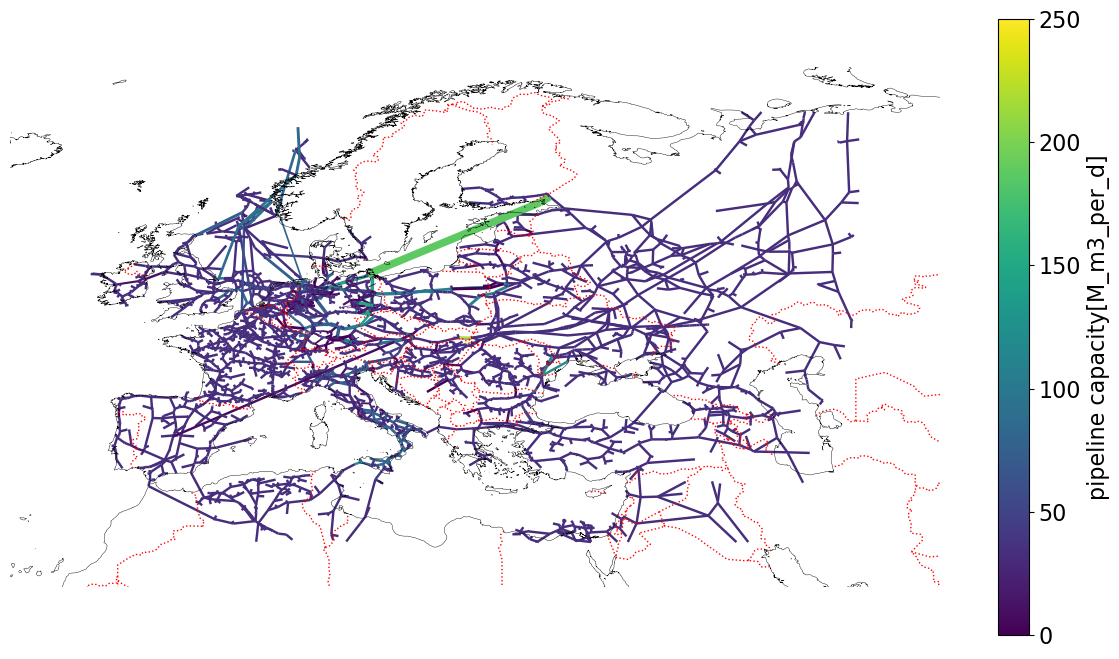

In [737]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
N = nx.from_pandas_edgelist(gdf_Edges, "bus0", "bus1", edge_attr=["max_cap_M_m3_per_d", "max_pressure_bar", "diameter_mm", "is_bothDirection", "length_km", "start_year", "bus0", "bus1", "geometry"])
pos = gdf_nodes.apply(tuple, axis=1).to_dict()

edge_colors = [edge[2]["max_cap_M_m3_per_d"] for edge in N.edges(data=True)]
edge_widths = [edge[2]["max_pressure_bar"] / 40 for edge in N.edges(data=True)]

print("Max edge:", max(edge_colors))
print("Min edge:", min(edge_colors))

vmin = 0  
vmax = 250

cmap = plt.cm.Blues
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array(edge_colors)

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
nx.draw(N, pos=pos, node_size=0, edge_color=edge_colors, width=edge_widths, vmin=vmin, vmax=vmax, cmap='viridis')
ax.coastlines(resolution='10m', color='black', linewidth=0.3)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, color='red')
cbar = plt.colorbar(sm, orientation='vertical', shrink=0.8, ax=ax)
cbar.set_label('pipeline capacity[M_m3_per_d]')

plt.show()

# Task 1-c
Which is the pipeline with the highest maximum pressure?

In [738]:

max_pressure = gdf_Edges['max_pressure_bar'].max()
#display(max_pressure)
gdf_max_pressure = gdf_Edges[gdf_Edges['max_pressure_bar'] == max_pressure ]
display(gdf_max_pressure)


,diameter_mm,is_bothDirection,length_km,max_cap_M_m3_per_d,max_pressure_bar,start_year,bus0,bus1,geometry
index,,,,,,,,,
PLL_84_Seg_0_Seg_0_Seg_0,1153.0,0,1209.172213,150.68,220.0,2011.0,N_50_L_LMGN,SEQ_2254_p,"LINESTRING (13.42279 54.26859, 28.30912 60.44315)"
PLL_84_Seg_0_Seg_62_Seg_2,1153.0,0,75.621250,150.68,220.0,2011.0,SEQ_2254_p,N_12_L_LMGN,"LINESTRING (28.30912 60.44315, 29.16691 60.96367)"


# Task 1-d
What share of pipelines is bidirectional (i.e. they can transport gas in either direction)?

In [739]:
print()
#len(gdf_Edges)
gdf_bidirectional = gdf_Edges[gdf_Edges['is_bothDirection']== 1]
#len(gdf_bidirectional)
share_of_bidirectional = (len(gdf_bidirectional) / len(gdf_Edges)) * 100
print(f"the share of bidirectional pipelines is = {share_of_bidirectional} %")



the share of bidirectional pipelines is = 3.3091202582728005 %


# Task 1-e
Identify the subset of pipelines which cross borders. Check your code visually by plotting only
the crossborder pipelines on a similar map as before. What percentage of lines crosses borders?

# Task 1-f
Create a networkx.Graph from the pipeline data using the function nx.from_pandas_edgelist().
As attributes include the length, diameter, capacity and pressure of the pipeline.


In [740]:
N_f = nx.from_pandas_edgelist(gdf_Edges, "bus0", "bus1", edge_attr=["max_cap_M_m3_per_d", "max_pressure_bar", "diameter_mm", "length_km"])



# Task 1-g
Determine the number of nodes and edges.

In [741]:
Number_of_Nodes = N_f.number_of_nodes()
print(f"the number of nodes is = {Number_of_Nodes}")
print()
Number_of_edges = N_f.number_of_edges()
print(f"the number of edges is = {Number_of_edges}")


the number of nodes is = 4659

the number of edges is = 5566


# Task 1_h
Compute the average degree of the network

In [742]:
NF_degree_dict =dict(N_f.degree()).values()
N_f_degree_mean = sum(NF_degree_dict) / len(NF_degree_dict)
print(f"average degree of the network is = {N_f_degree_mean}")

average degree of the network is = 2.389353938613436


# Task 1-i
 Plot the frequency distribution of degrees as a bar chart or histogram

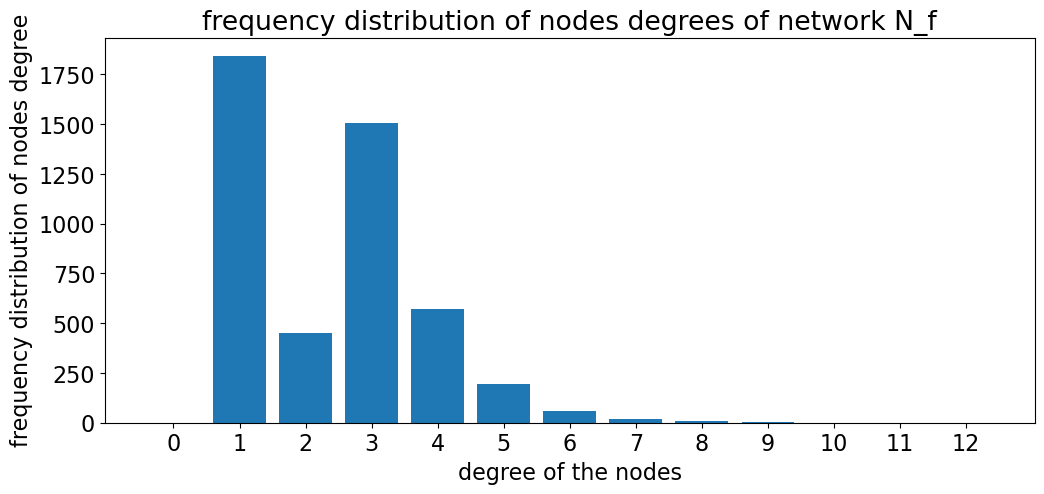

In [743]:
frequency_degrees = nx.degree_histogram(N_f)
degrees = range(len(frequency_degrees))

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(degrees,frequency_degrees)
ax.set_xlabel('degree of the nodes')
ax.set_xticks(degrees)
ax.set_ylabel('frequency distribution of nodes degree')
ax.set_title('frequency distribution of nodes degrees of network N_f')
plt.show()
 

# Task 1-j
Compute the adjacency and incidence matrix of the network.

In [744]:
A = nx.adjacency_matrix(N_f, weight=None).todense()

K = nx.incidence_matrix(N_f, oriented=True).todense()
#K
print()
print()
print("------------------------------------------------------------------------------------------------------------------------------------------")
print()
print()



------------------------------------------------------------------------------------------------------------------------------------------




 # Task 2-a
 Read the provided datasets into two separate pandas.DataFrame.

In [745]:
url_powerplants = "https://tubcloud.tu-berlin.de/s/P9qPttqFg3ciKEy/download/powerplants.csv"
url_technologies = "https://tubcloud.tu-berlin.de/s/XjtnxyNPtPP6eDQ/download/technologies.csv"

df_Powerplants = pd.read_csv(url_powerplants)
#print(df_powerplants.head(30))
df_technologies= pd.read_csv(url_technologies)
display(df_technologies)
df_powerplants = pd.merge(df_Powerplants, df_technologies[['Carrier', 'co2_emissions']], left_on='carrier', right_on='Carrier', how='left')
df_powerplants = df_powerplants.drop(columns=['Carrier'])
df_powerplants = df_powerplants.rename(columns={'co2_emissions': 'co2_ton'})

df_powerplants = pd.merge(df_powerplants, df_technologies[['Carrier', 'color']], left_on='carrier', right_on = 'Carrier', how = 'left')
df_powerplants = df_powerplants.drop(columns=['Carrier'])
df_powerplants = df_powerplants.rename(columns={'color': 'Color'})
display(df_powerplants.head(20))


,Carrier,co2_emissions,color
0,onshore wind,0.00,#235ebc
1,solar,0.00,#f9d002
2,nuclear,0.00,#ff9000
3,biomass,0.00,#0c6013
4,CCGT,0.20,#b20101
5,OCGT,0.20,#d35050
6,offshore wind,0.00,#74c6f2
7,lignite,0.41,#9e5a01
8,oil,0.27,#262626
9,coal,0.34,#707070


,Unnamed: 0,efficiency,marginal_cost,p_nom,carrier,p_max_pu,co2_ton,Color
0,3371 biomass,0.470000,14.893617,20.569100,biomass,1.000000,0.00,#0c6013
1,3371 onwind,1.000000,2.000000,206.573309,onshore wind,0.085297,0.00,#235ebc
2,3371 ror,0.900000,3.000000,44.060000,run of river,0.660853,0.00,#4adbc8
3,3371 solar,1.000000,1.000000,324.967191,solar,0.159534,0.00,#f9d002
4,3372 CCGT,0.586794,38.453915,1822.000000,CCGT,1.000000,0.20,#b20101
5,3372 biomass,0.470000,14.893617,25.054000,biomass,1.000000,0.00,#0c6013
6,3372 onwind,1.000000,2.000000,36.480151,onshore wind,0.082753,0.00,#235ebc
7,3372 ror,0.900000,3.000000,43.100000,run of river,0.660853,0.00,#4adbc8
8,3372 solar,1.000000,1.000000,241.129750,solar,0.125991,0.00,#f9d002
9,3373 OCGT,0.380600,57.311350,25.400000,OCGT,1.000000,0.20,#d35050


# Task 2-b
Write a Python function for plotting the merit order curve (supply side)


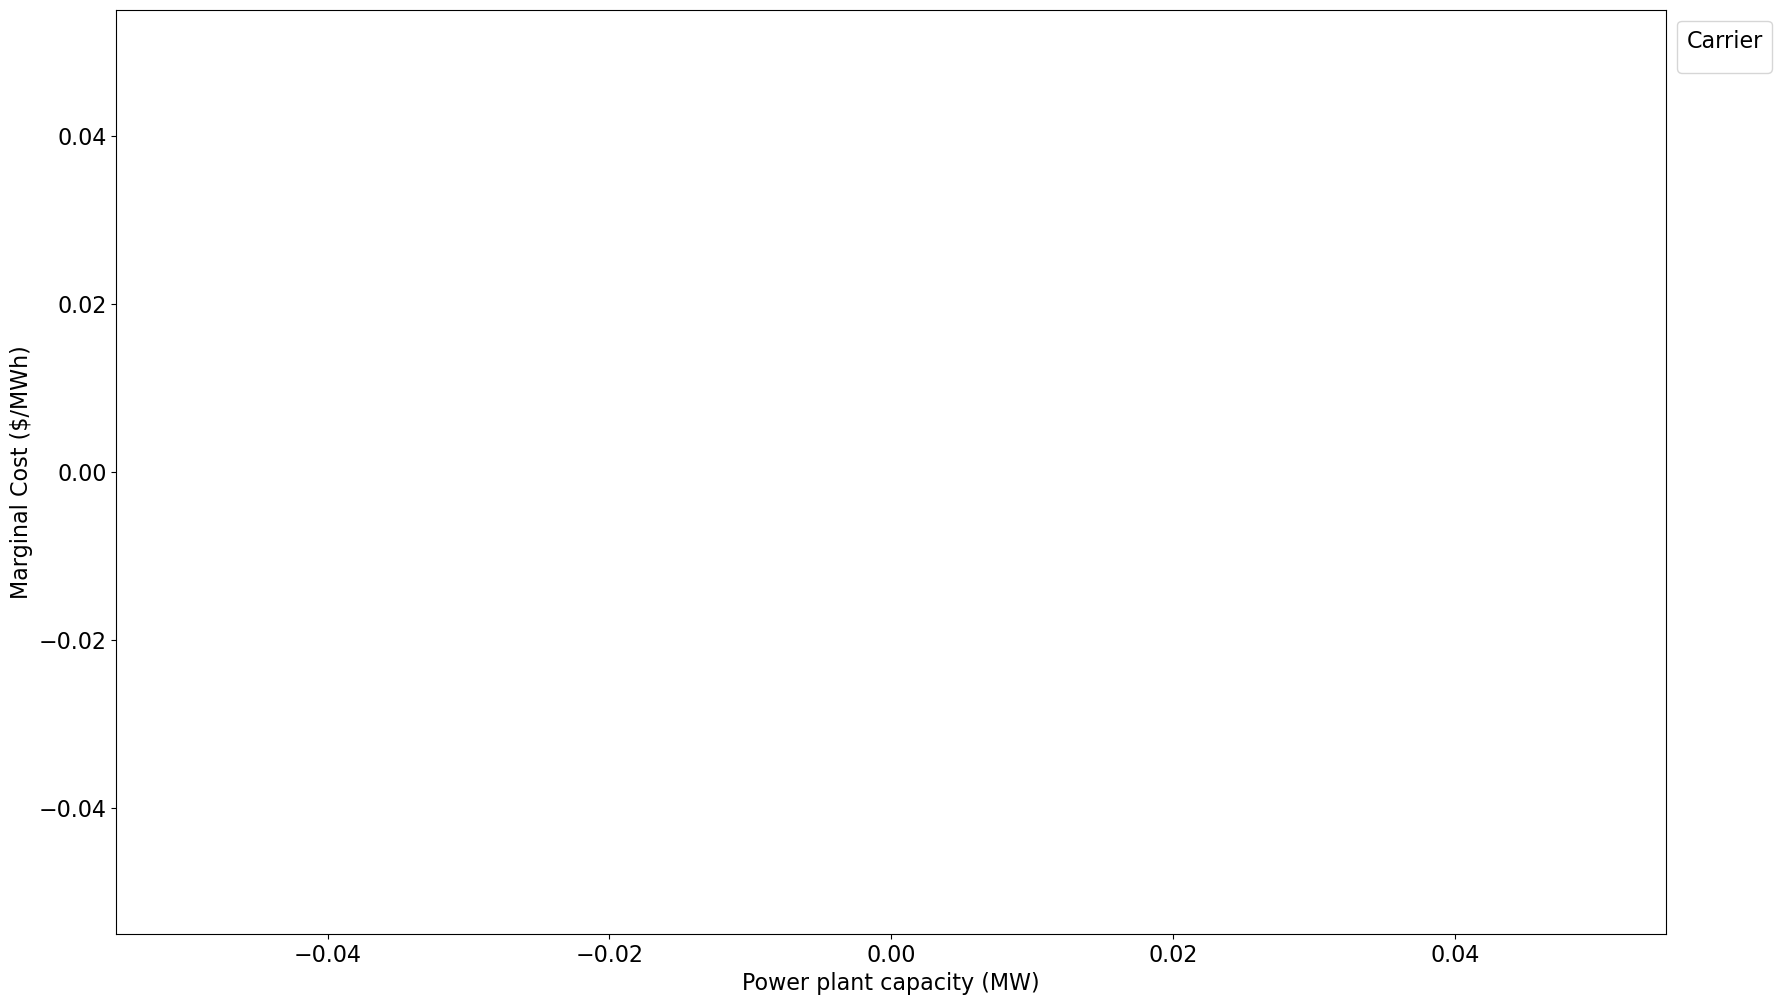

In [746]:
Columnname = ['carrier','p_nom','p_max_pu','efficiency','marginal_cost','co2_ton','Color']  
Empty_DataFrame = pd.DataFrame(columns = Columnname) #creating a "merged DataFrame" from two DataFrame included  power plant data, and another for the carrier-specific information.
#print(Empty_DataFrame)

def merit_order_curve(Empty_DataFrame):
    
    Empty_DataFrame['net_produced_power'] = Empty_DataFrame['p_nom']*Empty_DataFrame['p_max_pu']# net electricity
    df_powerplant_sort_marginal_cost =  Empty_DataFrame.sort_values(by='marginal_cost') #sorting marginal values for merit order effect
    
    #df_powerplant_sort_marginal_cost.set_index('carrier', inplace = True)
    sort_marginal_cost = ['solar','onshore wind','offshore wind','run of river','pumped hydro','hydro reservoir','lignite','nuclear','biomass','coal','CCGT','OCGT','oil']
    #df_powerplant_sort_marginal_cost.set_index(pd.Index(sort_marginal_cost), inplace=True)
    df_powerplant_sort_marginal_cost['comulative power'] = df_powerplant_sort_marginal_cost['net_produced_power'].cumsum()
    
    plt.figure(figsize = (20, 12))
    plt.rcParams["font.size"] = 16

     
    
    
    colors = ["#f9d002","#235ebc","#74c6f2","#4adbc8","#08ad97","#08ad97","#9e5a01","#ff9000","#0c6013","#707070","#b20101","#d35050","#262626"]
    xticks_pos = df_powerplant_sort_marginal_cost["comulative power"].values.tolist()
    right_edges_bars = [0] + xticks_pos[:-1] 
    y = df_powerplant_sort_marginal_cost["marginal_cost"].values.tolist()
    w = df_powerplant_sort_marginal_cost["net_produced_power"].values.tolist()
    
    fig = plt.bar(right_edges_bars,
            height = y,
            width = w,
            fill = True,
            color = df_powerplant_sort_marginal_cost['Color'],
            align='edge')

    #plt.xlim(0, Empty_DataFrame["net_produced_power"].sum())
    #plt.ylim(0, Empty_DataFrame["marginal_cost"].max())
    legend = df_powerplant_sort_marginal_cost.groupby('carrier')['Color'].unique().apply(lambda x: x[0]).to_dict()
    legend_bar = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=carrier)
                   for carrier, color in legend.items()]
    plt.legend(handles=legend_bar, title='Carrier', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xlabel("Power plant capacity (MW)")
    plt.ylabel("Marginal Cost ($/MWh)")
    plt.show()
    
merit_order_curve(Empty_DataFrame =Empty_DataFrame )


# Task 2-c-i
Plot the merit order curve using the function you created for the marginal costs given in the dataset

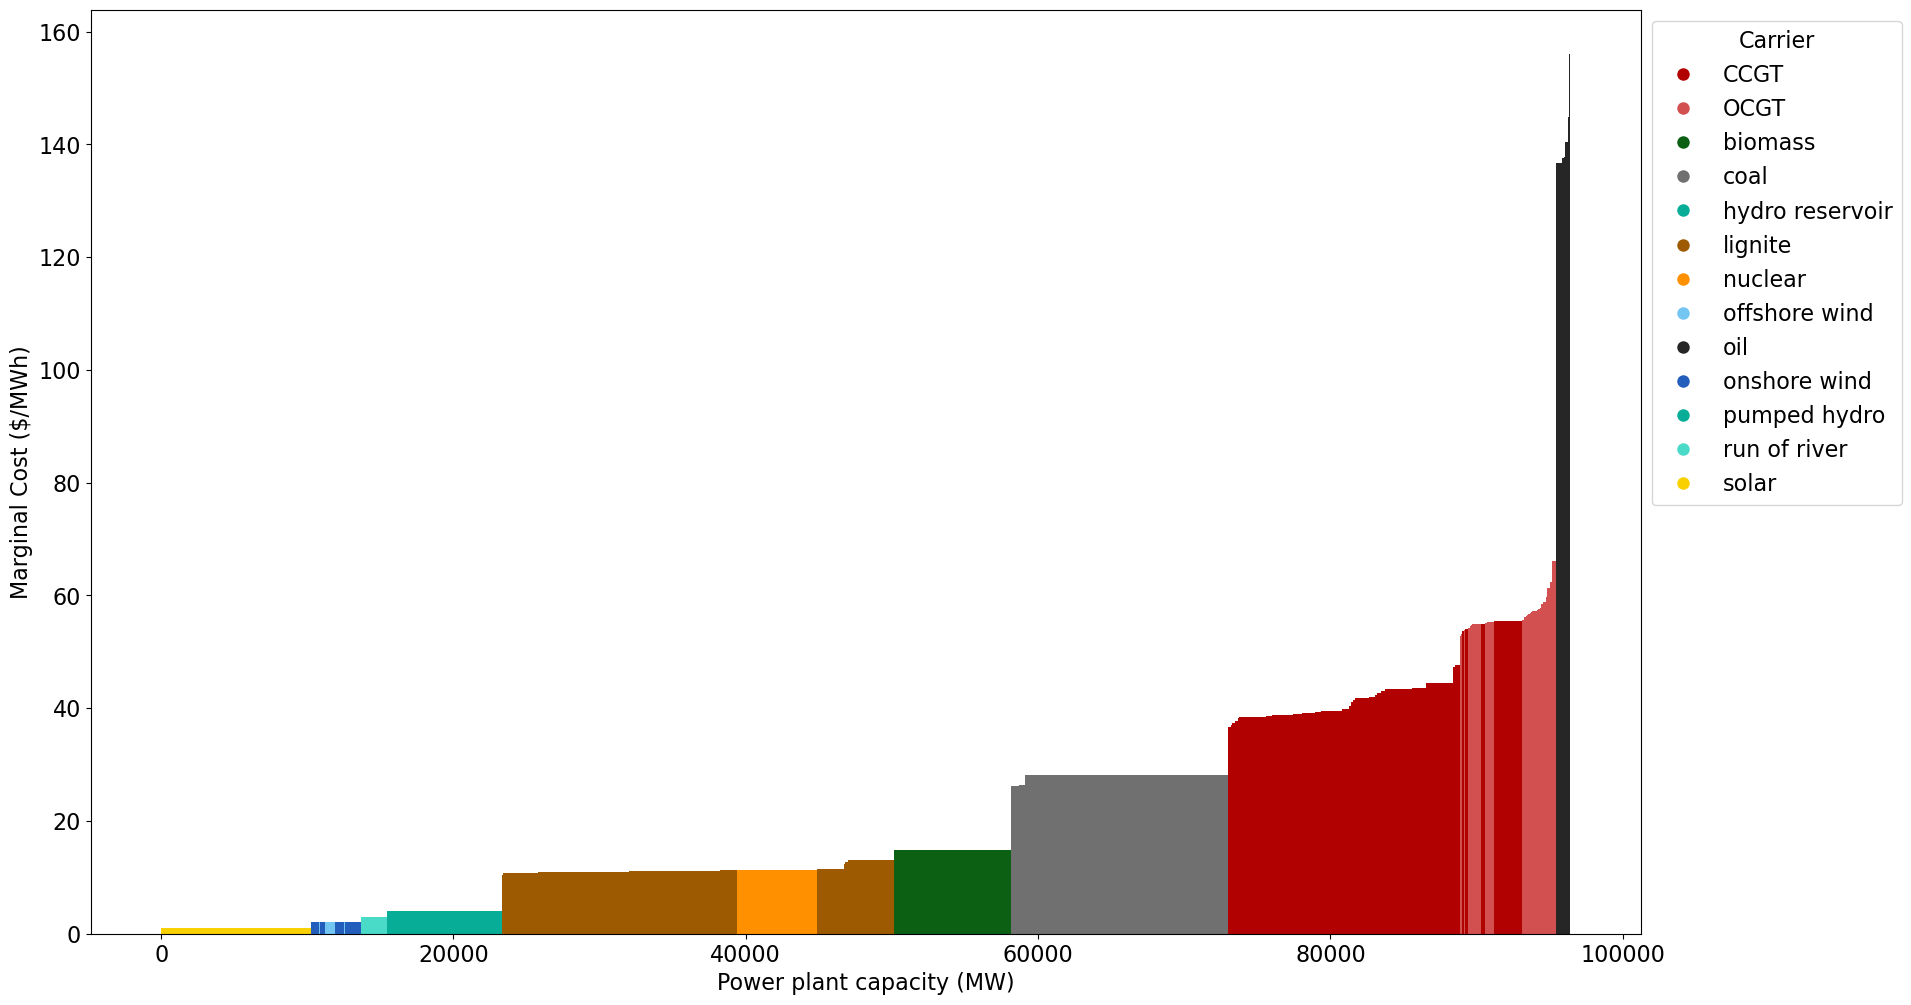

In [747]:

     ### To limit the x-axis and y-axis in the diagram, you need to remove the hashtags (#) from the corresponding arguments(line 34 and 35) ###

merit_order_curve(Empty_DataFrame = df_powerplants)


# Task 2-c-ii
Plot the merit order curve using the function you created with an added carbon price of 85 €/t𝐶𝑂2

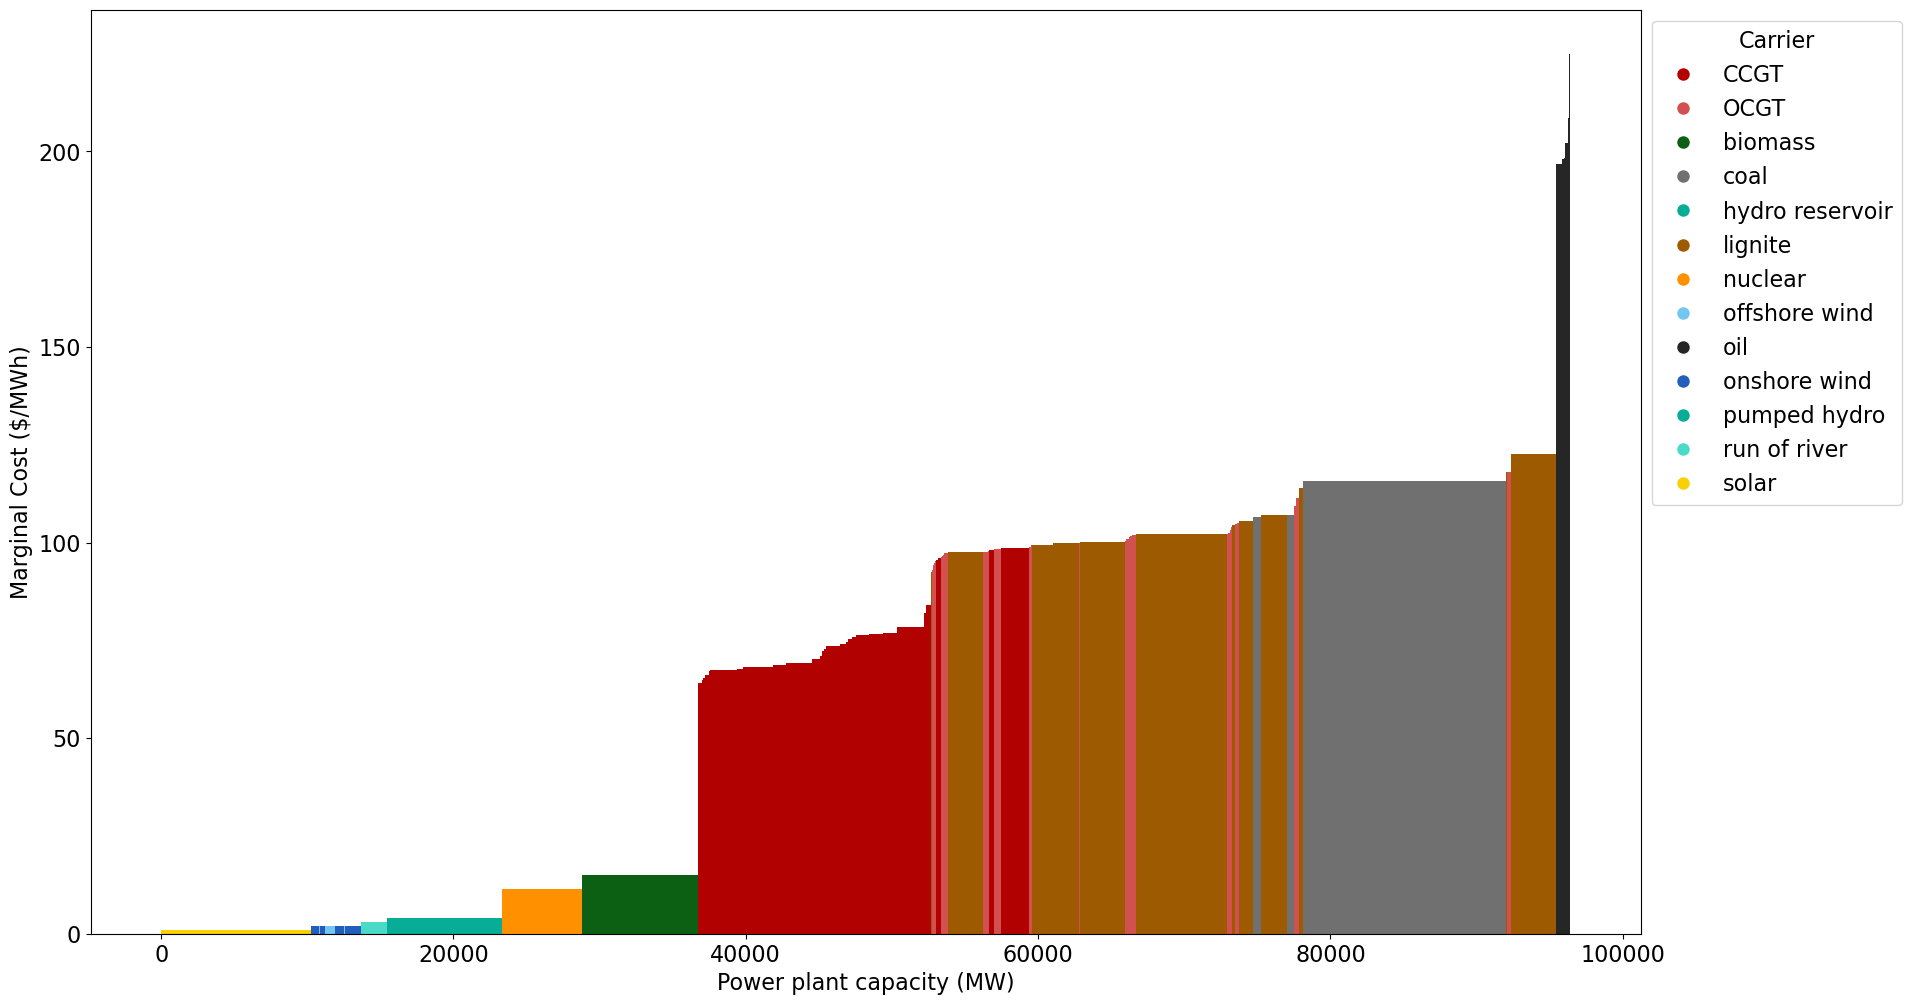

In [748]:
df_added_carbon_price = df_powerplants.copy()
df_added_carbon_price['marginal_cost']= ((1/df_powerplants['efficiency']) * df_powerplants['co2_ton'] * 85) + df_powerplants['marginal_cost']

merit_order_curve(Empty_DataFrame = df_added_carbon_price)


# Task 2-b-iii
additionally to ii. with a gas price increased by 60 €/MWh𝑡ℎ

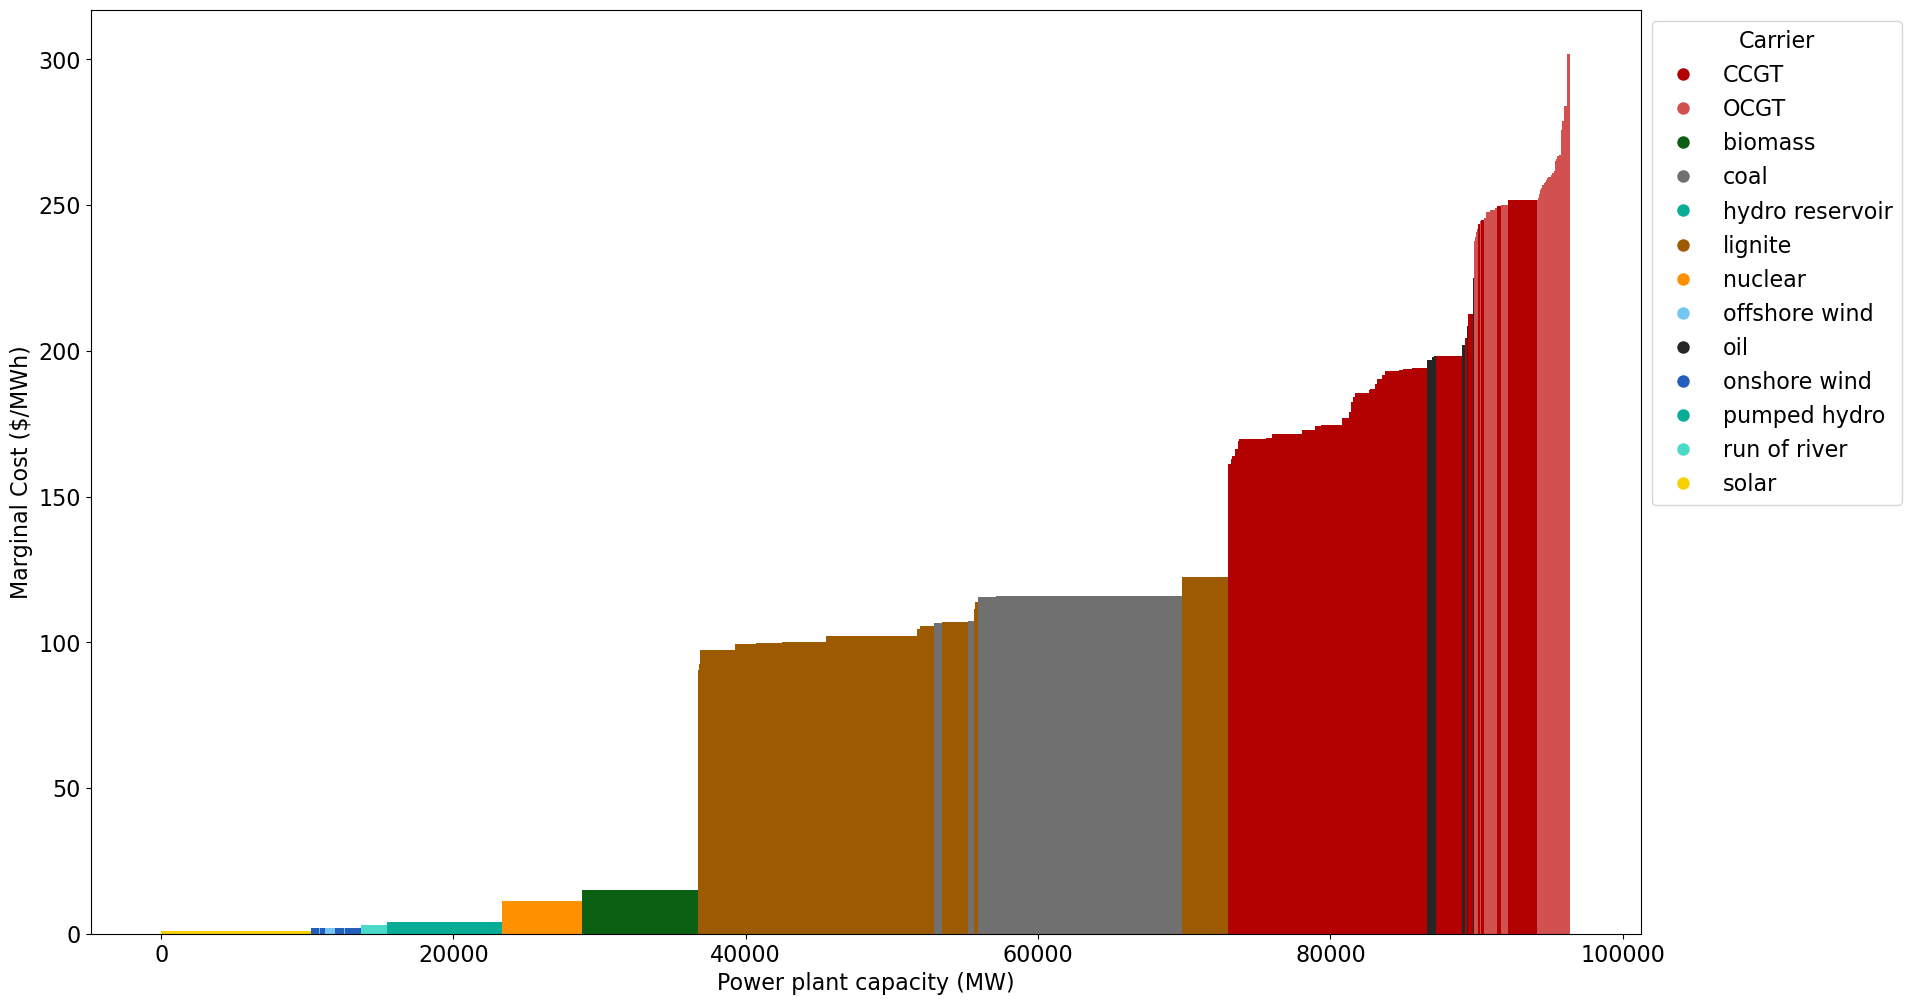

In [749]:
df_added_carbon_gas_price = df_added_carbon_price.copy()
df_added_carbon_gas_price.loc[(df_added_carbon_gas_price['carrier'] == 'OCGT') | (df_added_carbon_gas_price['carrier'] == 'CCGT'),'marginal_cost'] = df_added_carbon_gas_price['marginal_cost'] + ((1/df_added_carbon_price['efficiency'])*60)

merit_order_curve(Empty_DataFrame = df_added_carbon_gas_price)


# Task 2-d_i
the market clearing price at demand = 72 GW

In [750]:
print("    for the case that Electricity clearing price is determined by the marginal costs given in the dataset : ")
df_powerplants_sorted = df_powerplants.copy()
df_powerplants_sorted.sort_values(by='marginal_cost', inplace = True)
df_powerplants_sorted['comulative power'] = df_powerplants_sorted['net_produced_power'].cumsum()
df_powerplants_sorted.set_index('Unnamed: 0', inplace = True)
demand1 = 72000
for index1 in df_powerplants_sorted.index:

    if df_powerplants_sorted.loc[index1, "comulative power"] < demand1:
        pass
    else:
        cut_off_power_plant1 = index1
        print ("Power plant that sets the electricity price is: ", cut_off_power_plant1)
        break
        
#print(f"Electricity clearing price:   {df_powerplants_sorted.loc[cut_off_power_plant1, 'marginal_cost']} $/MWh")
print()



print("    for the case that Electricity clearing price is determined by the marginal costs included co2 price : ")
df_added_carbon_price_sorted = df_added_carbon_price.copy()
df_added_carbon_price_sorted.sort_values(by='marginal_cost', inplace = True)
df_added_carbon_price_sorted['comulative power'] = df_added_carbon_price_sorted['net_produced_power'].cumsum()
df_added_carbon_price_sorted.set_index('Unnamed: 0', inplace = True)
demand = 72000
for index in df_added_carbon_price_sorted.index:

    if df_added_carbon_price_sorted.loc[index, "comulative power"] < demand:
        pass
    else:
        cut_off_power_plant = index
        print ("Power plant that sets the electricity price is: ", cut_off_power_plant)
        break
        
#print(f"Electricity clearing price:   {df_added_carbon_price_sorted.loc[cut_off_power_plant, 'marginal_cost']} $/MWh")
print()



print("    for the case that Electricity clearing price is determined by the marginal costs included co2 and increased gas price : ")
df_added_carbon_gas_price_sorted = df_added_carbon_gas_price.copy()
df_added_carbon_gas_price_sorted.sort_values(by='marginal_cost', inplace = True)
df_added_carbon_gas_price_sorted['comulative power'] = df_added_carbon_gas_price_sorted['net_produced_power'].cumsum()
df_added_carbon_gas_price_sorted.set_index('Unnamed: 0', inplace = True)
demand2 = 72000
for index2 in df_added_carbon_gas_price_sorted.index:

    if df_added_carbon_gas_price_sorted.loc[index2, "comulative power"] < demand2:
        pass
    else:
        cut_off_power_plant2 = index2
        print ("Power plant that sets the electricity price is: ", cut_off_power_plant2)
        break
        
#print(f"Electricity clearing price:   {df_added_carbon_gas_price_sorted.loc[cut_off_power_plant2, 'marginal_cost']} $/MWh")
print()

aaa = [
    ["given powerplants data",df_powerplants_sorted.loc[cut_off_power_plant1, 'marginal_cost'] ],
    ["powerplants data included co2 price",df_added_carbon_price_sorted.loc[cut_off_power_plant, 'marginal_cost']],
    ["powerplants data included co2 and gas price", df_added_carbon_gas_price_sorted.loc[cut_off_power_plant2, 'marginal_cost']]
]
heads = ["cases  i,ii,iii", "Electricity clearing price[\u20AC]"]
table = tabulate(aaa, heads, tablefmt="grid")
print(table)





    for the case that Electricity clearing price is determined by the marginal costs given in the dataset : 
Power plant that sets the electricity price is:  4698 coal

    for the case that Electricity clearing price is determined by the marginal costs included co2 price : 
Power plant that sets the electricity price is:  4705 lignite

    for the case that Electricity clearing price is determined by the marginal costs included co2 and increased gas price : 
Power plant that sets the electricity price is:  4715 lignite

+---------------------------------------------+---------------------------------+
| cases  i,ii,iii                             |   Electricity clearing price[€] |
+=============================================+=================================+
| given powerplants data                      |                          28.197 |
+---------------------------------------------+---------------------------------+
| powerplants data included co2 price         |                

# Task 2-d-ii
the total power dispatched per technology

In [751]:

print("total power dispatched per technology in unit of MWh for three cases are listed below:")

index_cutoff1 = df_powerplants_sorted.index.get_loc('4698 coal')
df_powerplants_till_cutoff = df_powerplants_sorted.iloc[:index_cutoff1+1]
power_dispached_per_technology['powerplants data[MW]'] =pd.DataFrame(df_powerplants_till_cutoff.groupby('carrier')['net_produced_power'].sum())

index_cutoff = df_added_carbon_price_sorted.index.get_loc('4705 lignite')
df_added_carbon_price_sorted_till_cutoff = df_added_carbon_price_sorted.iloc[:index_cutoff+1]
power_dispached_per_technology['power dispached included co2 price[MW]']=df_added_carbon_price_sorted_till_cutoff.groupby('carrier')['net_produced_power'].sum()

index_cutoff2 = df_added_carbon_gas_price_sorted.index.get_loc('4715 lignite')
df_added_carbon_gas_price_sorted_till_cutoff2=df_added_carbon_gas_price_sorted.iloc[:index_cutoff2+1]
power_dispached_per_technology['power dispached included co2 and gas price[MW]']=df_added_carbon_gas_price_sorted_till_cutoff2.groupby('carrier')['net_produced_power'].sum()

display(power_dispached_per_technology.iloc[:, -3:])




total power dispatched per technology in unit of MWh for three cases are listed below:


,powerplants data[MW],power dispached included co2 price[MW],power dispached included co2 and gas price[MW]
carrier,,,
CCGT,NaN,18468.029000,NaN
OCGT,NaN,2699.626000,NaN
biomass,8004.647826,8004.647826,8004.647826
coal,14276.565103,NaN,14829.727277
hydro reservoir,169.500000,169.500000,169.500000
lignite,21375.403267,14970.278608,21375.403267
nuclear,5468.000000,5468.000000,5468.000000
offshore wind,861.509114,861.509114,861.509114
oil,NaN,NaN,NaN


# Task 2-d-iii
the resulting revenue per technology


In [752]:
# revenue = total power dispatched per technology * market clearing electricity price
print("revenue for the carriers in unit of € is listed as below:")
Revenue_per_technology = pd.DataFrame()
Revenue_per_technology['revenue for powerplants[\u20AC/h]'] = pd.DataFrame(df_powerplants_sorted.loc[cut_off_power_plant1, 'marginal_cost'] * power_dispached_per_technology['powerplants data[MW]'])
Revenue_per_technology['revenue for carrier included co2 price[\u20AC/h]'] = df_added_carbon_price_sorted.loc[cut_off_power_plant, 'marginal_cost'] * power_dispached_per_technology['power dispached included co2 price[MW]']
Revenue_per_technology['revenue for carrier included co2 and gas price[\u20AC/h]'] = df_added_carbon_gas_price_sorted.loc[cut_off_power_plant2, 'marginal_cost'] * power_dispached_per_technology['power dispached included co2 and gas price[MW]']
#Revenue_per_technology = pd.DataFrame(revenue_per_technology)
display(Revenue_per_technology)




revenue for the carriers in unit of € is listed as below:


,revenue for powerplants[€/h],revenue for carrier included co2 price[€/h],revenue for carrier included co2 and gas price[€/h]
carrier,,,
CCGT,NaN,1.885012e+06,NaN
OCGT,NaN,2.755479e+05,NaN
biomass,225706.812185,8.170259e+05,9.809939e+05
coal,402555.873580,NaN,1.817428e+06
hydro reservoir,4779.386364,1.730068e+04,2.077274e+04
lignite,602721.598180,1.528000e+06,2.619621e+06
nuclear,154181.030303,5.581129e+05,6.701200e+05
offshore wind,24291.946369,8.793332e+04,1.055806e+05
oil,NaN,NaN,NaN


# Task 2-d-iv
the operational costs per technology 


In [753]:
operational_costs_per_technology = pd.DataFrame() 
print("operational costs per technology in unit € are shown as below : ")

df_powerplants_till_cutoff['operation cost']= df_powerplants_till_cutoff['marginal_cost']*df_powerplants_till_cutoff['net_produced_power']
operational_costs_per_technology['operation cost of powerplant[\u20AC/h]'] = df_powerplants_till_cutoff.groupby('carrier')['operation cost'].sum()

df_added_carbon_price_sorted_till_cutoff['operation cost']= df_added_carbon_price_sorted_till_cutoff['marginal_cost']*df_added_carbon_price_sorted_till_cutoff['net_produced_power']
operational_costs_per_technology['operation cost of powerplant included co2 price[\u20AC/h]'] = df_added_carbon_price_sorted_till_cutoff.groupby('carrier')['operation cost'].sum()

df_added_carbon_gas_price_sorted_till_cutoff2['operation cost']= df_added_carbon_gas_price_sorted_till_cutoff2['marginal_cost']*df_added_carbon_gas_price_sorted_till_cutoff2['net_produced_power']
operational_costs_per_technology['operation cost of powerplant included co2 and gas price[\u20AC/h]'] = df_added_carbon_gas_price_sorted_till_cutoff2.groupby('carrier')['operation cost'].sum()


display(operational_costs_per_technology)

operational costs per technology in unit € are shown as below : 


,operation cost of powerplant[€/h],operation cost of powerplant included co2 price[€/h],operation cost of powerplant included co2 and gas price[€/h]
carrier,,,
biomass,119218.159111,1.192182e+05,1.192182e+05
coal,400714.790442,NaN,1.708305e+06
hydro reservoir,678.000000,6.780000e+02,6.780000e+02
lignite,242876.813699,1.502014e+06,2.236150e+06
nuclear,62219.212121,6.221921e+04,6.221921e+04
offshore wind,1723.018227,1.723018e+03,1.723018e+03
onshore wind,5123.204737,5.123205e+03,5.123205e+03
pumped hydro,30638.480000,3.063848e+04,3.063848e+04
run of river,5331.826064,5.331826e+03,5.331826e+03


# Task 2-d-v
the profits per technology

In [754]:
#profits = revenue - operational costs

profits_per_technology = pd.DataFrame()

profits_per_technology['profits of powerplants[\u20AC/h]'] = Revenue_per_technology['revenue for powerplants[\u20AC/h]']-operational_costs_per_technology['operation cost of powerplant[\u20AC/h]']
profits_per_technology['profits of powerplants included co2 price[\u20AC/h]']=Revenue_per_technology['revenue for carrier included co2 price[\u20AC/h]']-operational_costs_per_technology['operation cost of powerplant included co2 price[\u20AC/h]']
profits_per_technology['profits of powerplants included co2 and gas price[\u20AC/h]']=Revenue_per_technology['revenue for carrier included co2 and gas price[\u20AC/h]']-operational_costs_per_technology['operation cost of powerplant included co2 and gas price[\u20AC/h]']

display(profits_per_technology)



,profits of powerplants[€/h],profits of powerplants included co2 price[€/h],profits of powerplants included co2 and gas price[€/h]
carrier,,,
CCGT,NaN,NaN,NaN
OCGT,NaN,NaN,NaN
biomass,106488.653074,6.978077e+05,8.617758e+05
coal,1841.083137,NaN,1.091230e+05
hydro reservoir,4101.386364,1.662268e+04,2.009474e+04
lignite,359844.784481,2.598668e+04,3.834705e+05
nuclear,91961.818182,4.958937e+05,6.079008e+05
offshore wind,22568.928142,8.621030e+04,1.038575e+05
oil,NaN,NaN,NaN


# Task 2-d-vi
the carbon intensity of the system

In [755]:
from tabulate import tabulate

df_powerplants_till_cutoff['net produced co2'] = ((1/df_powerplants_till_cutoff['efficiency']) * df_powerplants_till_cutoff['co2_ton']*df_powerplants_till_cutoff['net_produced_power'])/df_powerplants_till_cutoff['net_produced_power']
co2_intensity_of_powerplants = df_powerplants_till_cutoff['net produced co2'].sum()

df_added_carbon_price_sorted_till_cutoff['net produced co2'] = ((1/df_added_carbon_price_sorted_till_cutoff['efficiency']) * df_added_carbon_price_sorted_till_cutoff['co2_ton']*df_added_carbon_price_sorted_till_cutoff['net_produced_power'])/df_added_carbon_price_sorted_till_cutoff['net_produced_power']
co2_intensity_included_co2_price = df_added_carbon_price_sorted_till_cutoff['net produced co2'].sum()

df_added_carbon_gas_price_sorted_till_cutoff2['net produced co2'] = ((1/df_added_carbon_gas_price_sorted_till_cutoff2['efficiency']) * df_added_carbon_gas_price_sorted_till_cutoff2['co2_ton']*df_added_carbon_gas_price_sorted_till_cutoff2['net_produced_power'])/df_added_carbon_gas_price_sorted_till_cutoff2['net_produced_power']
co2_intensity_included_co2_and_gas_price = df_added_carbon_gas_price_sorted_till_cutoff2['net produced co2'].sum()


a = [
    ["co2_intensity_of_powerplants", co2_intensity_of_powerplants],
    ["co2_intensity_included_co2_price",co2_intensity_included_co2_price],
    ["co2_intensity_included_co2_and_gas_price", co2_intensity_included_co2_and_gas_price]
]
head = ["systems", "Carbon Intensity[t/MWh]"]
table = tabulate(a, head, tablefmt="grid")
print(table)



+------------------------------------------+---------------------------+
| systems                                  |   Carbon Intensity[t/MWh] |
+==========================================+===========================+
| co2_intensity_of_powerplants             |                   45.0609 |
+------------------------------------------+---------------------------+
| co2_intensity_included_co2_price         |                   51.6016 |
+------------------------------------------+---------------------------+
| co2_intensity_included_co2_and_gas_price |                   46.0912 |
+------------------------------------------+---------------------------+


# Task 2-e
Describe the major differences you observe between the four cases.

### Answer
market clearing price : in case that we have no added carbon and increased gas price the market clearing price is pretty lower than other two cases. in the defined demand the electricity price is always determined by the carriers, which produces carbon and this is why that the electricity price increases with added carbon price. with increasing the gas price the electricity price will be set still by lignite but with higher marginal cost.

total power dispatched per technology : in our data lignite and coal power plants have lower marginal cost but higher specific carbon dioxide emissions than powerplants with gas carriers. if we don't consider the added carbon price we can use the lignite and coal powerplants at first according to the merit order effect and this causes more power dispached in this both carriers. by adding the carbon price the gas powerplants must be operated at first, because the sum of added carbon price and marginal cost in gas carriers is lower than lignite and coal, this is why that with increasing the carbon price the total power dispatch by gas carriers is more than lignite and coal. but with added gas price we can cover our total demand by cheaper lignite and coal and therefore we have no power dispatch by gas carriers.

revenue for the carriers: the renewable carriers in this case have always revenue, because they cover always the baseload and with increasing the electricity price due to added carbon and gas price their revenue will be increased highly as well. the revenue of the fossil fuel carriers depend on their power dispatch. for instance the gas powerplants have revenue just in the time of added carbon price, because at the level of our demand they dont dispatch power with their increased price, actualy our demand will met by the cheaper fossil fuel carriers like lignite and coal.

operational cost : because the marginal cost of the powerplants are constant, the operational costs of them depends on their power dispatch. for all renewable and baseload carriers in the three cases this value are constant. But for the carriers like lignite, coal and gas depend on the amount of dispatched power this values can be changed.

profits per technology : as it can be seen in the resulted data the renewable carriers or generally the carriers without production of co2 have higher profit with adding co2 and gas prices.










# Task3-a-i
create all variables for generation and transmission

In [756]:
import pyomo.environ as pe
import pandas as pd

marginal_costs = {
    "brz": {"WindSolar_brz": 0, "Coal_brz": 35, "Gas_brz": 70},
    "bol": {"hydro_bol": 4, "Gas_bol": 65},
    "par": {"hydro_par": 6},
}

capacities = {
    "brz": {"Coal_brz": 52000, "WindSolar_brz": 8000, "Gas_brz": 12000},
    "bol": {"hydro_bol": 2000, "Gas_bol": 1000},
    "par": {"hydro_par": 1500},
}

demand = {"brz": 65000, "bol": 1100, "par": 900}

#transmission_line = {"transmission_brz_bol": 600, "transmission_bol_par": 50, "transmission_brz_par": 200}
Transmission_line = {("brz", "bol"): 600, ("bol", "par"): 50, ("brz", "par"): 200}


# Task 3-a-ii
formulate the objective function for minimising the operational costs

In [757]:

m = pe.ConcreteModel()
m.dual = pe.Suffix(direction=pe.Suffix.IMPORT)
m.countries = pe.Set(initialize=capacities.keys())
technologies = list(marginal_costs["brz"].keys() | marginal_costs["bol"].keys() | marginal_costs["par"].keys())
m.technologies = pe.Set(initialize=technologies)
m.g = pe.Var(m.countries, m.technologies, within=pe.NonNegativeReals)
m.f = pe.Var(m.countries, m.countries)
m.cost = pe.Objective(
    expr=sum(marginal_costs[c].get(s, 0) * m.g[c, s] for s in m.technologies for c in m.countries)
)



# Task 3-a-iii
build the necessary constraints, including the technical limits of generation and transmission
and the Kirchhoff Laws

In [758]:
@m.Constraint(m.countries, m.technologies)
def generator_limit(m, c, s):
    return m.g[c, s] <= capacities[c].get(s, 0)

@m.Constraint(m.countries)
def kcl(m, c):
    if c == "brz":
        inflow = 0
        outflow = -1
    elif c == "bol":
        inflow = 1
        outflow = -1
    else:
        inflow = 1
        outflow = 0
    return (
        sum(m.g[c, s] for s in m.technologies)
        + (inflow * sum(m.f[s, c] for s in m.countries))
        + (outflow * sum(m.f[s, c] for s in m.countries))
        == demand[c]
    )

m.kcl.pprint()

@m.Constraint(m.countries, m.countries)
def line_limit(m, ab, zu):
    return m.f[ab, zu] == Transmission_line.get((ab, zu), 0)




kcl : Size=3, Index=countries, Active=True
    Key : Lower   : Body                                                                                                                                                                                               : Upper   : Active
    bol :  1100.0 :     g[bol,Gas_bol] + g[bol,Gas_brz] + g[bol,hydro_par] + g[bol,WindSolar_brz] + g[bol,Coal_brz] + g[bol,hydro_bol] + f[brz,bol] + f[bol,bol] + f[par,bol] - (f[brz,bol] + f[bol,bol] + f[par,bol]) :  1100.0 :   True
    brz : 65000.0 : g[brz,Gas_bol] + g[brz,Gas_brz] + g[brz,hydro_par] + g[brz,WindSolar_brz] + g[brz,Coal_brz] + g[brz,hydro_bol] + 0*(f[brz,brz] + f[bol,brz] + f[par,brz]) - (f[brz,brz] + f[bol,brz] + f[par,brz]) : 65000.0 :   True
    par :   900.0 :   g[par,Gas_bol] + g[par,Gas_brz] + g[par,hydro_par] + g[par,WindSolar_brz] + g[par,Coal_brz] + g[par,hydro_bol] + f[brz,par] + f[bol,par] + f[par,par] + 0*(f[brz,par] + f[bol,par] + f[par,par]) :   900.0 :   True


# Task 3-a-iv
solve the optimisation model with a solver of your choice

In [759]:
pe.SolverFactory("appsi_highs").solve(m).write()



INFO:pyomo.contrib.appsi.solvers.highs:WARNING: No semi-integer/integer variables in model with non-empty integrality
INFO:pyomo.contrib.appsi.solvers.highs:Presolving model
INFO:pyomo.contrib.appsi.solvers.highs:1 rows, 1 cols, 1 nonzeros
INFO:pyomo.contrib.appsi.solvers.highs:0 rows, 0 cols, 0 nonzeros
INFO:pyomo.contrib.appsi.solvers.highs:Presolve : Reductions: rows 0(-30); columns 0(-27); elements 0(-51) - Reduced to empty
INFO:pyomo.contrib.appsi.solvers.highs:Solving the original LP from the solution after postsolve
INFO:pyomo.contrib.appsi.solvers.highs:Model   status      : Optimal
INFO:pyomo.contrib.appsi.solvers.highs:Objective value     :  2.1783000000e+06
INFO:pyomo.contrib.appsi.solvers.highs:HiGHS run time      :          0.00


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: 2178300.0
  Upper bound: 2178300.0
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: 1
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Termination message: TerminationCondition.optimal
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


# Task 3-a-v
retrieve the generator dispatch, power flows, objective function and market prices. Label all v.
units

In [760]:
print("objective function:")
print()
display(m.cost.pprint())
print()
print("dispatched powers:")
print()
display(pd.Series(m.g.get_values()).unstack())
print()
print("power flows:")
print()
display(m.line_limit.pprint())
print()
print("objective variable:")
print()
print(f"objective variable is {m.cost()}[euro/h]")
print()
display(pd.Series(m.dual.values(), m.dual.keys()))



objective function:

cost : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 0*g[brz,Gas_bol] + 65*g[bol,Gas_bol] + 0*g[par,Gas_bol] + 70*g[brz,Gas_brz] + 0*g[bol,Gas_brz] + 0*g[par,Gas_brz] + 0*g[brz,hydro_par] + 0*g[bol,hydro_par] + 6*g[par,hydro_par] + 0*g[brz,WindSolar_brz] + 0*g[bol,WindSolar_brz] + 0*g[par,WindSolar_brz] + 35*g[brz,Coal_brz] + 0*g[bol,Coal_brz] + 0*g[par,Coal_brz] + 0*g[brz,hydro_bol] + 4*g[bol,hydro_bol] + 0*g[par,hydro_bol]


None


dispatched powers:



,Coal_brz,Gas_bol,Gas_brz,WindSolar_brz,hydro_bol,hydro_par
bol,-0.0,0.0,-0.0,-0.0,1100.0,-0.0
brz,52000.0,-0.0,5000.0,8000.0,-0.0,-0.0
par,-0.0,-0.0,-0.0,-0.0,-0.0,650.0



power flows:

line_limit : Size=9, Index=line_limit_index, Active=True
    Key            : Lower : Body       : Upper : Active
    ('bol', 'bol') :   0.0 : f[bol,bol] :   0.0 :   True
    ('bol', 'brz') :   0.0 : f[bol,brz] :   0.0 :   True
    ('bol', 'par') :  50.0 : f[bol,par] :  50.0 :   True
    ('brz', 'bol') : 600.0 : f[brz,bol] : 600.0 :   True
    ('brz', 'brz') :   0.0 : f[brz,brz] :   0.0 :   True
    ('brz', 'par') : 200.0 : f[brz,par] : 200.0 :   True
    ('par', 'bol') :   0.0 : f[par,bol] :   0.0 :   True
    ('par', 'brz') :   0.0 : f[par,brz] :   0.0 :   True
    ('par', 'par') :   0.0 : f[par,par] :   0.0 :   True


None


objective variable:

objective variable is 2178300.0[euro/h]



generator_limit[brz,Gas_bol]         -70.0
generator_limit[brz,Gas_brz]          -0.0
generator_limit[brz,hydro_par]       -70.0
generator_limit[brz,WindSolar_brz]   -70.0
generator_limit[brz,Coal_brz]        -35.0
generator_limit[brz,hydro_bol]       -70.0
generator_limit[bol,Gas_bol]          -0.0
generator_limit[bol,Gas_brz]          -4.0
generator_limit[bol,hydro_par]        -4.0
generator_limit[bol,WindSolar_brz]    -4.0
generator_limit[bol,Coal_brz]         -4.0
generator_limit[bol,hydro_bol]        -0.0
generator_limit[par,Gas_bol]          -6.0
generator_limit[par,Gas_brz]          -6.0
generator_limit[par,hydro_par]        -0.0
generator_limit[par,WindSolar_brz]    -6.0
generator_limit[par,Coal_brz]         -6.0
generator_limit[par,hydro_bol]        -6.0
kcl[brz]                              70.0
kcl[bol]                               4.0
kcl[par]                               6.0
line_limit[brz,brz]                   70.0
line_limit[brz,bol]                   -0.0
line_limit[

# Task 3-b- i
create a new pypsa network


In [761]:
import pypsa
n = pypsa.Network()

# Task 3-b- ii
add the generators, lines, and loads to the network

In [762]:
power_plants = {
    "brazil": {"coal": 52000, "wind and solar": 8000, "gas": 12000},
    "bolivia": {"hydro": 2000, "gas": 1000 },
    "paraguay": {"hydro" : 1500 }
}

loads = {
    "brazil": 65000,
    "bolivia": 1100,
    "paraguay": 900,
}

fuel_cost_brz = {
    "coal" : 35,
    "gas" : 70,
    "wind and solar" : 0,
}

fuel_cost_bol = {
    "hydro" : 4,
    "gas" : 65,
}    

fuel_cost_par = {
    "hydro" : 6,
}


n.add("Bus","brz",y=-15.7801, x=-47.9292)
n.add("Bus","bol",y=-16.5000, x=-68.1500)
n.add("Bus","par",y=-23.4425, x=-58.4438)

for tech, p_nom in power_plants["brazil"].items():
    n.add(
        "Generator",
        f"brazil {tech}",
        bus="brz",
        carrier=tech,
        p_nom=p_nom,
        marginal_cost=fuel_cost_brz.get(tech, 0),
    )


for tech, p_nom in power_plants["bolivia"].items():
    n.add(
        "Generator",
        f"bolivia {tech}",
        bus="bol",
        carrier=tech,
        p_nom=p_nom,
        marginal_cost=fuel_cost_bol.get(tech, 0),
    )

for tech, p_nom in power_plants["paraguay"].items():
    n.add(
        "Generator",
        f"paraguay {tech}",
        bus="par",
        carrier=tech,
        p_nom=p_nom,
        marginal_cost=fuel_cost_par.get(tech, 0),
    )

n.generators

n.add(
    "Load",
    "brz electricity demand",
    bus="brz",
    p_set=loads["brazil"],
    carrier="electricity",
)

n.add(
    "Load",
    "bol electricity demand",
    bus="bol",
    p_set=loads["bolivia"],
    carrier="electricity",
)
n.add(
    "Load",
    "par electricity demand",
    bus="par",
    p_set=loads["paraguay"],
    carrier="electricity",
)

n.loads

n.add(
    "Line",
    "brz-bol",
    bus0="brz",
    bus1="bol",
    s_nom=600,
    x=1,
    r=1,
)

n.add(
    "Line",
    "brz-par",
    bus0="brz",
    bus1="par",
    s_nom=200,
    x=1,
    r=1,
)

n.add(
    "Line",
    "bol-par",
    bus0="bol",
    bus1="par",
    s_nom=50,
    x=1,
    r=1,
)

n.lines


attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
brz-bol,brz,bol,,1.0,1.0,0.0,0.0,600.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brz-par,brz,par,,1.0,1.0,0.0,0.0,200.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bol-par,bol,par,,1.0,1.0,0.0,0.0,50.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task 3-b-iii
 solve the prepared network with a solver of your choice

In [763]:

n.optimize(solver_name="highs")


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.solvers:Log file at C:\Users\modi\AppData\Local\Temp\highs.log.
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9 primals, 22 duals
Objective: 2.15e+06
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

# Task 3-b-iv
retrieve the generator dispatch, power flows, objective function and market prices. Label all units

In [764]:
n.generators_t.p   # the dispatch of the generators

Generator,brazil coal,brazil wind and solar,brazil gas,bolivia hydro,bolivia gas,paraguay hydro
snapshot,,,,,,
now,52000.0,8000.0,4550.0,1400.0,-0.0,1050.0


In [765]:
n.lines_t.p0    #power flow in transmission lines

Line,brz-bol,brz-par,bol-par
snapshot,,,
now,-250.0,-200.0,50.0


In [766]:
n.buses_t.marginal_price  # shadow price

Bus,brz,bol,par
snapshot,,,
now,70.0,4.0,6.0


In [767]:
#n.model.objective.expression

# Task 3-c

no answer

# Task 3-d
Using the PyPSA plotting function  n.plot(), plot a map (that includes country borders) showing
the dispatch per technology as a pie chart for each node sized in proportion to the total generation
per node, the line loading as color of the lines, the line capacity as the width of the lines. You
may need to add the carriers to the network, specifying their respective colors, and appropriate
coordinates to the buses to present the countries on a map. A legend is only required for the
colors of the carriers.


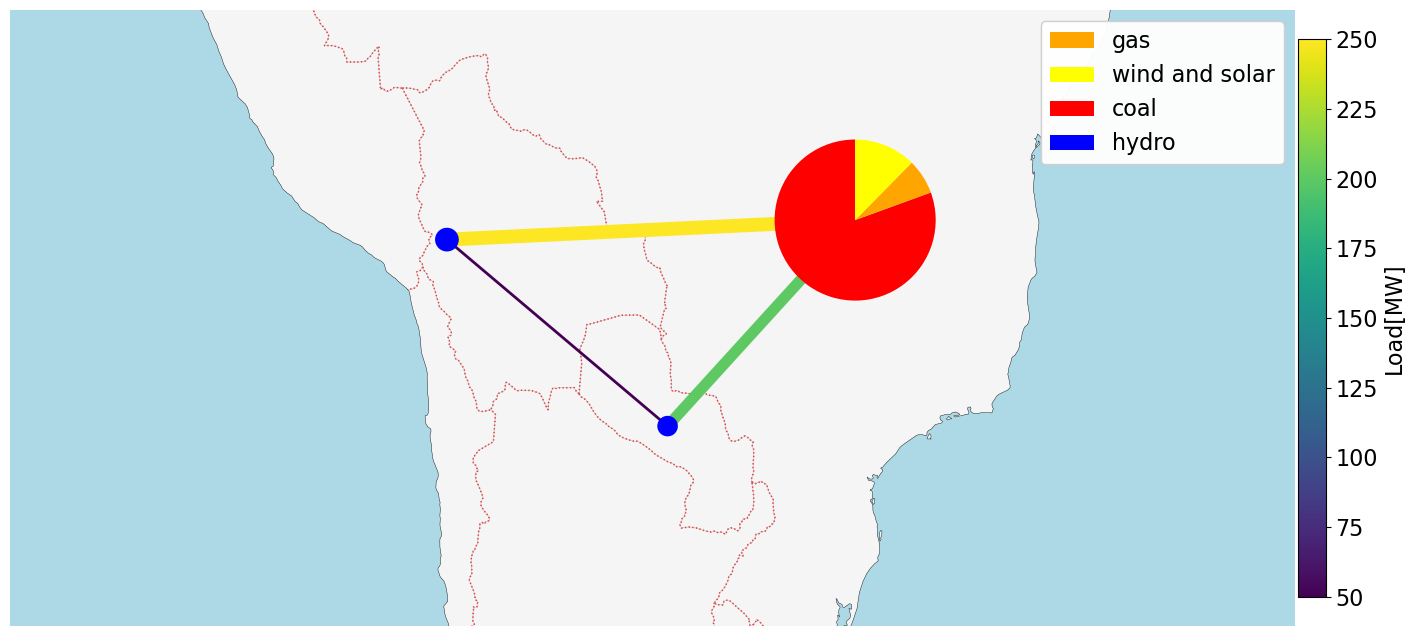

In [768]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd


fig = plt.figure(figsize=(18, 8))
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, color='red')

s = n.generators_t.p.loc["now"].groupby([n.generators.bus, n.generators.carrier]).sum()
colors={"gas": "orange", "wind and solar": "yellow","coal":"red","hydro":"blue"}

n_line_T=n.lines_t.p0.T.abs()  #merge two dataframe to apply transmission line width to the plot
df_n_lines=n.lines
new_nlines = df_n_lines.merge(n_line_T, left_index=True, right_index=True)

for col in n_line_T.columns:
    new_nlines[col + '_new_column'] = new_nlines.apply(lambda row: row[col] + row['now'], axis=1)

line_widths = new_nlines.now / new_nlines.now.max() * 10
plot3d=n.plot(ax=ax, margin=1, bus_sizes=s/5000, bus_colors=colors,color_geomap=True,line_widths=line_widths,line_colors=n.lines_t.p0.mean().abs())
plt.colorbar(plot3d[1],label = "Load[MW]",fraction=0.02, pad = 0.002)
pypsa.plot.add_legend_patches(ax, list(colors.values()), list(colors.keys()))

                              

# Task 3-d
What measure would you recommend to Brazil to increase the import capacity of hydro-electricity
from its neighbouring country? Explain why. How much cheaper (in percent) could the dispatch
cost for the particular hour under investigation become through this measure?

# Answer

currently considering the one way transmission line between the countries the electricity price in Brazil is determined by the marginal cost of gas, which has a amount of 70 euro per megawatt-hour. if brazil could construct a incoming transmission line from bolivia and paraguay for importing the hydro-electricity the electricity price in brasil could be cheaper than 70 euro per megawatt-hour. in this case brasil can met his demand first by his wind and solar capacity and then with coal and the rest of the demand by imported hydro-electricity from the other both country,which cuauses cheaper electricity price in brasil as shown below:

demand of Brazil = 65000 MW  
sum of coal and wind-solar capacity in Brazil = 60000 MW
the rest demand = 50000 MW

This means that brazil should import 5000 MW from hydro electricity of bolivia and paraguay to met its demand. In this case consequently the electricity price in brazil will be stand at the marginal cost of its coal price of 35 euro per MWh(according to the merit order effect). But the constructing of the transmission line and also the congestion rent of that has costs itself. if we dont consider this costs, electricity price will be 50% cheaper than actual price.

Actualy the total exess hydro capacity in paraguay and bolivia is not enough for covering the deficit of demand in brazil(in case if the demand of brazil is met just by coal and wind-solar). this means that brazil should invest on the hydro energy to expand the hydro-capacity in paraguay and bolivia and the transmission line as well. 

generally it must be considered, how much the electricity price could be reduced if the fixed costs of constructing new hydro powerplants and congestion rent of electricity transsmition were added to the investigation and finally it must be destinguished that it is worthfull than using the gas power plant in brazil with cost of 70 euro per MWh.